# **References / Links** 

This notebooks walks through three Rosetta Protocols/Movers

- Point Mutation Scan

https://rosettacommons.github.io/PyRosetta.notebooks/

- InterfaceAnalyzer

https://www.rosettacommons.org/docs/latest/scripting_documentation/RosettaScripts/Movers/movers_pages/analysis/InterfaceAnalyzerMover


- PeptiDerive

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4987930/


**Drive** 

https://drive.google.com/drive/folders/1j1nWkKyHedvGSSA9zboZYnbKRFovlGiR?usp=sharing

# **Installing necessary python libraries**


In [ ]:
!pip install pyrosettacolabsetup
!pip install py3Dmol
!pip install nglview

import sys
sys.path.append("/usr/local/lib/python3.9/site-packages")

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 69, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/__init__.py", line 91, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr

# **Import pyrosetta**

pyrosetta.init() is very important and needs to be run before using any of the pyrosetta functions. Don't forget this step! 

In [ ]:
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()
import pyrosetta; pyrosetta.init()
from pyrosetta import *
init()

ModuleNotFoundError: ignored

# **Load a pose from PDB**

In [ ]:
pose = pose_from_file("7l0j.clean.pdb")

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.30391 seconds.
core.import_pose.import_pose: File '7l0j.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue PRO:CtermProteinFull 211
core.conformation.Conformation: Found disulfide between residues 4 68
core.conformation.Conformation: current variant for 4 CYS
core.conformation.Conformation: current variant for 68 CYS
core.conformation.Conformation: current variant for 4 CYD
core.conformation.Conformation: current variant for 68 CYD
core.conformation.Conformation: Found disulfide between residues 30 99
core.conformation.Conformation: current variant for 30 CYS
core.conformation.Conformation: current variant for 99 CYS
core.conformation.Conformation: current variant for 30 CYD
core.conformation.Conformation: current variant for 99 C

# Point Mutation Scan

Mutating a protein to increase it’s stability is one of the most commonly used protocol in Protein Design

In [ ]:
sfxn = get_score_function()
pose = pose_from_file("7l0j.clean.pdb")
relaxed_pose = pose_from_file("7l0j.relax.pdb")

print("Pose before relaxing")
print(sfxn(pose))

print("Pose after relaxing")
print(sfxn(relaxed_pose))

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
basic.io.database: Database file opened: scoring/score_functions/rama/fd/

In [ ]:
#Score the interface
from pyrosetta.rosetta.protocols.analysis import *

analyze_interface = InterfaceAnalyzerMover()
analyze_interface.apply(relaxed_pose)
relaxed_pose.dump_pdb("relaxed_pose_with_interface_analyzer.pdb")
analyze_interface.get_all_data().complex_total_energy

protocols.analysis.InterfaceAnalyzerMover: Using normal constructor
protocols.evaluation.ChiWellRmsdEvaluatorCreator: Evaluation Creator active ...
protocols.analysis.InterfaceAnalyzerMover: Making an interface set with default calculator.
protocols.analysis.InterfaceAnalyzerMover: NULL scorefunction. Initialize from cmd line.
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.analysis.InterfaceAnalyzerMover: Detecting disulfides in the separated pose.
core.conformation.Conformation: Found disulfide between residues 4 68
core.conformation.Conformation: current variant for 4 CYD
core.conformation.Conformation: current variant for 68 CYD
core.conformation.Conformation: current variant for 4 CYD
core.conformation.Conformation: current variant for 68 CYD
core.conformation.Conformation: Found disulfide between residues 30 99
core.conformation.Conformation: current variant for 30 CYD
core.conformation.Conformation: current variant for 99 CYD
core.conformation.Conformation: c

vector1_double[-511.891, -240.843, -271.047]

Energy Terms from Interface Analyzer

https://www.rosettacommons.org/docs/latest/application_documentation/analysis/interface-analyzer

- dSASA_int: The solvent accessible area burried at the interface, in square Angstroms.
- dG_separated: The change in Rosetta energy when the interface forming chains are separated, versus when they are complexed: the binding energy. Calculated by actually separating (and optionally repacking) the chains.
- dG_separated/dSASAx100: Separated binding energy per unit interface area * 100 to make units fit in score file. Scaling by dSASA controls for large interfaces having more energy. The factor of 100 is to allow standard 2.45 notation isntead of something like 2.45E-2.
- delta_unsatHbonds: The number of buried, unsatisfied hydrogen bonds at the interface
- packstat: Rosetta's packing statistic score for the interface (0=bad, 1=perfect)
- dG_cross: Binding energy of the interface calculated with cross-interface energy terms, rather than by separating the interface. Inaccurate sometimes because of environmental dependencies in some energy terms, including hbond energy and solvation.
- dG_cross/dSASAx100: As above but for dGcross
- cen_dG: Binding energy using centroid mode and score3 score function.
- nres_int: Number of residues at the interface
- per_residue_energy_int: Average energy of each residue at the interface
- side1_score: Energy of one side of the interface
- side2_score: Energy of the other side of the interface
- nres_all: total number of residues in the entire complex
- side1_normalized: Average per-residue energy on one side of the interface.
- side2_normalized: Average per-residue energy on the other side of the interface.
- complex_normalized: Average energy of a residue in the entire complex
- hbonds_int: Total cross-interface hydrogen bonds found.
- hbond_E_fraction: Amount of interface energy (dG_separated) accounted for by cross interface H-bonds

In [ ]:
from pyrosetta.rosetta.core.pack.task import *
from pyrosetta.rosetta.protocols import *
from pyrosetta.rosetta.core.select import *

def pack(pose, posi, amino, scorefxn):
    #Reference
    #https://nbviewer.org/github/RosettaCommons/PyRosetta.notebooks/blob/master/notebooks/06.08-Point-Mutation-Scan.ipynb
    # Select Mutate Position
    # ResidueIndexSelector returns True for residue positions that match a given residue index
    mut_posi = pyrosetta.rosetta.core.select.residue_selector.ResidueIndexSelector()
    mut_posi.set_index(posi)
    #print(pyrosetta.rosetta.core.select.get_residues_from_subset(mut_posi.apply(pose)))

    # Select Neighbor Position
    # Selects neighbors in the focus  - By default that is set to 10 angstorms
    nbr_selector = pyrosetta.rosetta.core.select.residue_selector.NeighborhoodResidueSelector()
    nbr_selector.set_focus_selector(mut_posi)
    nbr_selector.set_include_focus_in_subset(True)
    #print(pyrosetta.rosetta.core.select.get_residues_from_subset(nbr_selector.apply(pose)))

    # Select No Design Area
    # Don't design the mutant position
    not_design = pyrosetta.rosetta.core.select.residue_selector.NotResidueSelector(mut_posi)
    #print(pyrosetta.rosetta.core.select.get_residues_from_subset(not_design.apply(pose)))

    # The task factory accepts all the task operations
    tf = pyrosetta.rosetta.core.pack.task.TaskFactory()

    # These are pretty standard
    tf.push_back(pyrosetta.rosetta.core.pack.task.operation.InitializeFromCommandline())
    tf.push_back(pyrosetta.rosetta.core.pack.task.operation.IncludeCurrent())
    tf.push_back(pyrosetta.rosetta.core.pack.task.operation.NoRepackDisulfides())

    # Disable Packing
    prevent_repacking_rlt = pyrosetta.rosetta.core.pack.task.operation.PreventRepackingRLT()
    prevent_subset_repacking = pyrosetta.rosetta.core.pack.task.operation.OperateOnResidueSubset(prevent_repacking_rlt, nbr_selector, True )
    tf.push_back(prevent_subset_repacking)

    # Disable design
    tf.push_back(pyrosetta.rosetta.core.pack.task.operation.OperateOnResidueSubset(
        pyrosetta.rosetta.core.pack.task.operation.RestrictToRepackingRLT(),not_design))

    # Enable design
    aa_to_design = pyrosetta.rosetta.core.pack.task.operation.RestrictAbsentCanonicalAASRLT()
    aa_to_design.aas_to_keep(amino)
    tf.push_back(pyrosetta.rosetta.core.pack.task.operation.OperateOnResidueSubset(aa_to_design, mut_posi))
    
    # Create Packer
    packer = pyrosetta.rosetta.protocols.minimization_packing.PackRotamersMover()
    packer.task_factory(tf)
    packer.apply(pose)

    return pose


In [ ]:
position_to_mutate = 106
amino_acids = ['G','A','L','M','F','W','K','Q','E','S','P','I','C','Y','H','R','N','D','T']
relaxed_pose = pose_from_file("7l0j.relax.pdb")
analyze_interface = InterfaceAnalyzerMover()
analyze_interface.apply(relaxed_pose)
wt_complex_energy=analyze_interface.get_all_data().complex_total_energy

for amino_acid in amino_acids:
  copy_relaxed_pose = Pose()
  copy_relaxed_pose.assign(relaxed_pose)
  pack(copy_relaxed_pose,106,amino_acid,sfxn)
  analyze_interface = InterfaceAnalyzerMover()
  analyze_interface.apply(copy_relaxed_pose)
  print("Mutation position {} in PDB to {}. Score Wild Type {} and Mutation {}".format(position_to_mutate,amino_acid,wt_complex_energy,analyze_interface.get_all_data().complex_total_energy))


core.import_pose.import_pose: File '7l0j.relax.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 111 148
core.conformation.Conformation: current variant for 111 CYS
core.conformation.Conformation: current variant for 148 CYS
core.conformation.Conformation: current variant for 111 CYD
core.conformation.Conformation: current variant for 148 CYD
core.conformation.Conformation: Found disulfide between residues 142 166
core.conformation.Conformation: current variant for 142 CYS
core.conformation.Conformation: current variant for 166 CYS
core.conformation.Conformation: current variant for 142 CYD
core.conformation.Conformation: current variant for 166 CYD
core.conformation.Conformation: Found disulfide between residues 147 174
core.conformation.Conformation: current variant for 147 CYS
core.conformation.Conformation: current variant for 174 CYS
core.conformation.Conformation: current variant for 147 CYD
core.conformation.Conforma

# Peptiderive

Peptiderive is a protocol in rosetta to extract starting sequences of peptide inhibitors from a protein-protein interface. Simply, the protocol determines the most significant contributor to the binding energy at every specified length. For 10 mer - The protocol slides a window of 10 from beginning of the protein to the end by stepping one position at a time. 

https://www.rosettacommons.org/docs/latest/application_documentation/analysis/PeptiDerive

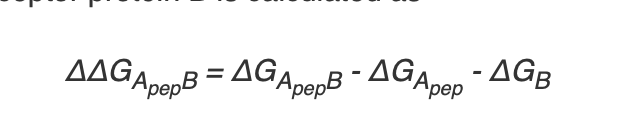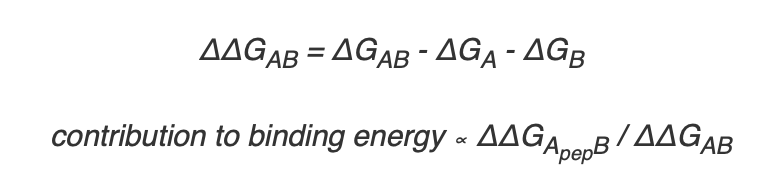

In [ ]:
from pyrosetta.rosetta.protocols.peptide_deriver import *
xml_string = """
<ROSETTASCRIPTS>
    <FILTERS>
        <PeptideDeriver name="peptiderive" 
        restrict_receptors_to_chains="{restrict_receptors_to_chains}" 
        restrict_partners_to_chains="{restrict_partners_to_chains}" 
        pep_lengths="{peptide_lengths}"
        dump_peptide_pose="true" 
        dump_report_file="true" 
        dump_prepared_pose="true" 
        dump_cyclic_poses="true" 
        skip_zero_isc="true" 
        do_minimize="true" 
        report_format="markdown" />
    </FILTERS>
    <PROTOCOLS>
        <Add filter_name="peptiderive"/>
    </PROTOCOLS>
</ROSETTASCRIPTS>
"""
peptide_length = "10,11,12,13,14,15"
receptor = "A"
partner = "B"
xml_protocol = pyrosetta.rosetta.protocols.rosetta_scripts.XmlObjects.create_from_string(xml_string.format(restrict_receptors_to_chains=receptor,restrict_partners_to_chains=partner,peptide_lengths=peptide_length))

protocols.rosetta_scripts.RosettaScriptsParser: Validating input script...
protocols.rosetta_scripts.RosettaScriptsParser: ...done
protocols.rosetta_scripts.RosettaScriptsParser: Parsed script:
<ROSETTASCRIPTS>
	<FILTERS>
		<PeptideDeriver do_minimize="true" dump_cyclic_poses="true" dump_peptide_pose="true" dump_prepared_pose="true" dump_report_file="true" name="Peptiderive" pep_lengths="10,11,12,13,14,15" report_format="markdown" restrict_partners_to_chains="B" restrict_receptors_to_chains="A" skip_zero_isc="true"/>
	</FILTERS>
	<PROTOCOLS>
		<Add filter_name="Peptiderive"/>
	</PROTOCOLS>
</ROSETTASCRIPTS>
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
protocols.rosetta_scripts.RosettaScriptsParser: Defined filter named "Peptiderive" of type PeptideDeriver
protocols.rosetta_scripts.ParsedProtocol: ParsedProtocol mover with the following settings
protocols.rose

In [ ]:
peptiderive_from_xml_protocol = xml_protocol.get_mover("ParsedProtocol")

Apply Peptiderive Protocol

In [ ]:
peptiderive_from_xml_protocol.apply(pose)

Streaming output truncated to the last 5000 lines.
core.conformation.Conformation: current variant for 4 CYD
core.conformation.Conformation: current variant for 68 CYD
core.conformation.Conformation: Found disulfide between residues 30 99
core.conformation.Conformation: current variant for 30 CYD
core.conformation.Conformation: current variant for 99 CYD
core.conformation.Conformation: current variant for 30 CYD
core.conformation.Conformation: current variant for 99 CYD
core.conformation.Conformation: Found disulfide between residues 34 101
core.conformation.Conformation: current variant for 34 CYD
core.conformation.Conformation: current variant for 101 CYD
core.conformation.Conformation: current variant for 34 CYD
core.conformation.Conformation: current variant for 101 CYD
core.conformation.Conformation: Found disulfide between residues 4 68
core.conformation.Conformation: current variant for 4 CYD
core.conformation.Conformation: current variant for 68 CYD
core.conformation.Conformati